In [6]:
# Import comet_ml at the top of your file, before sklearn!
from comet_ml import Experiment
import os
from dotenv import load_dotenv
import warnings

warnings.filterwarnings("ignore")

load_dotenv('../.env')
COMET_API_KEY = os.getenv('COMET_API_KEY')

In [7]:
exp = Experiment(
    api_key=COMET_API_KEY,
    project_name='ift6758',
    workspace='meriembchaaben',
)
exp.set_name('Question2/dataset')

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/meriembchaaben/ift6758/574d832c9baf4197bb6afa05a7715eb7



In [15]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.calibration import CalibrationDisplay 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

ImportError: cannot import name 'CalibrationDisplay' from 'sklearn.calibration' (C:\Users\merie\anaconda3\lib\site-packages\sklearn\calibration.py)

In [10]:
# Read and preprocess data
df = pd.read_csv('../data/AllSeasonsM2Q2.csv')
df = df.drop('Unnamed: 0', 1)
df = df[['distance', 'angle', 'Goal']]
df = df.rename({'Goal': 'is_goal'}, axis=1)
df = df[~(df['is_goal'].isnull() | df['distance'].isnull() | df['angle'].isnull())] #remove after fix
df['is_goal'] = df['is_goal'].astype(np.int64)
df.head()

,distance,angle,is_goal
0,13.000000,67.380135,0
1,13.341664,167.005383,0
2,76.157731,60.068488,0
3,57.974132,75.004921,0
4,61.717096,63.019769,0


In [24]:
X = df[['distance', 'angle']]
y = df['is_goal'].to_numpy()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)

In [25]:
print(f'Dataset size: {len(X)}')
print(f'Training dataset size: {len(X_train)}')
print(f'Validation dataset size: {len(X_val)}')

Dataset size: 305797
Training dataset size: 275217
Validation dataset size: 30580


In [26]:
exp.log_metrics({'Dataset size': len(X), 'Training dataset size': len(X_train), 'Validation dataset size': len(X_val)})

In [27]:
# goals rate
def goals_rate(df):
    nb_goals = len(df[df==1])
    nb_non_goals = len(df[df==0])
    goals_rate = nb_goals / (nb_goals+nb_non_goals)
    return goals_rate

gr1 = goals_rate(y)
gr2 = goals_rate(y_train)
gr3 = goals_rate(y_val)

print(f'** ALL ** Goals rate: {gr1} - Non-goals rate: {1-gr1}')
print(f'** Training ** Goals rate: {gr2} - Non-goals rate: {1-gr2}')
print(f'** Validation ** Goals rate: {gr3} - Non-goals rate: {1-gr3}')

** ALL ** Goals rate: 0.09490282769288122 - Non-goals rate: 0.9050971723071188
** Training ** Goals rate: 0.09525574364955654 - Non-goals rate: 0.9047442563504434
** Validation ** Goals rate: 0.09172661870503597 - Non-goals rate: 0.908273381294964


In [28]:
exp.log_metrics({'ALL - Goals rate': gr1, 'ALL - non-goals rate': 1-gr1})
exp.log_metrics({'Training - Goals rate': gr2, 'Training - non-goals rate': 1-gr2})
exp.log_metrics({'Validation - Goals rate': gr3, 'Validation - non-goals rate': 1-gr3})

In [29]:
exp.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/meriembchaaben/ift6758/05cfe1f0bfed4af5b9c94dc21798ac90
COMET INFO:   Metrics:
COMET INFO:     ALL - Goals rate            : 0.09490282769288122
COMET INFO:     ALL - non-goals rate        : 0.9050971723071188
COMET INFO:     Dataset size                : 305797
COMET INFO:     Training - Goals rate       : 0.09525574364955654
COMET INFO:     Training - non-goals rate   : 0.9047442563504434
COMET INFO:     Training dataset size       : 275217
COMET INFO:     Validation - Goals rate     : 0.09172661870503597
COMET INFO:     Validation - non-goals rate : 0.908273381294964
COMET INFO:     Validation dataset size     : 30580
COMET INFO:   Others:
COMET INFO:     Name : Question2/dataset
COMET INFO:   Uploads:
COMET INFO:     environment details      :

In [6]:
### Logistic regression on distance ###

X_train1 = X_train['distance'].to_numpy().reshape(-1, 1)
X_val1 = X_val['distance'].to_numpy().reshape(-1, 1)

lr_clf1 = LogisticRegression().fit(X_train1, y_train)

train_score1 = lr_clf1.score(X_train1, y_train)
val_score1 = lr_clf1.score(X_val1, y_val)

print('***** Logistic regression (distance) *****')
print(f'Training accuracy: {train_score1}')
print(f'Test accuracy: {val_score1}')

***** Logistic regression (distance) *****
Training accuracy: 0.9047442563504434
Test accuracy: 0.908273381294964


In [7]:
### Logistic regression on angle ###

X_train2 = X_train['angle'].to_numpy().reshape(-1, 1)
X_val2 = X_val['angle'].to_numpy().reshape(-1, 1)

lr_clf2 = LogisticRegression().fit(X_train2, y_train)

train_score2 = lr_clf2.score(X_train2, y_train)
val_score2 = lr_clf2.score(X_val2, y_val)

print('***** Logistic regression (angle) *****')
print(f'Training accuracy: {train_score2}')
print(f'Test accuracy: {val_score2}')

***** Logistic regression (angle) *****
Training accuracy: 0.9047442563504434
Test accuracy: 0.908273381294964


In [8]:
### Logistic regression on distance + angle ###

X_train3 = X_train.to_numpy().reshape(-1, 2)
X_val3 = X_val.to_numpy().reshape(-1, 2)

lr_clf3 = LogisticRegression().fit(X_train3, y_train)

train_score3 = lr_clf3.score(X_train3, y_train)
val_score3 = lr_clf3.score(X_val3, y_val)

print('***** Logistic regression (distance+angle) *****')
print(f'Training accuracy: {train_score3}')
print(f'Test accuracy: {val_score3}')

***** Logistic regression (distance+angle) *****
Training accuracy: 0.9047442563504434
Test accuracy: 0.908273381294964


In [9]:
### Random baseline ###
random_clf = DummyClassifier(strategy="uniform").fit(X_train3, y_train)

train_score4 = random_clf.score(X_train3, y_train)
val_score4 = random_clf.score(X_val3, y_val)

print('***** Random regression *****')
print(f'Training accuracy: {train_score4}')
print(f'Test accuracy: {val_score4}')

***** Random regression *****
Training accuracy: 0.4986792240304923
Test accuracy: 0.5009156311314584


Logistic Regression (trained on distance only): ROC AUC=0.692
Logistic Regression (trained on angle only): ROC AUC=0.498
Logistic Regression (trained on both distance and angle): ROC AUC=0.692
Random: ROC AUC=0.500


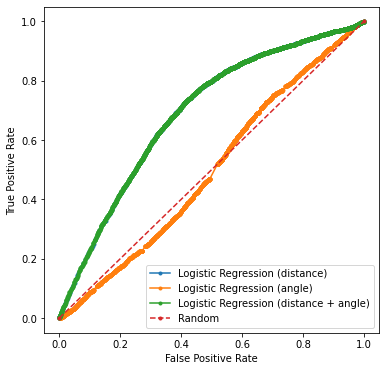

In [10]:
### ROC curve - AUC metric ###

lr_probs1 = lr_clf1.predict_proba(X_val1[:, :])[:,1]
lr_probs2 = lr_clf2.predict_proba(X_val2[:, :])[:,1]
lr_probs3 = lr_clf3.predict_proba(X_val3[:, :])[:,1]
random_probs = random_clf.predict_proba(X_val3[:, :])[:,1]


lr_auc1 = roc_auc_score(y_val, lr_probs1)
lr_auc2 = roc_auc_score(y_val, lr_probs2)
lr_auc3 = roc_auc_score(y_val, lr_probs3)
random_auc = roc_auc_score(y_val, random_probs)

print('Logistic Regression (trained on distance only): ROC AUC=%.3f' % (lr_auc1))
print('Logistic Regression (trained on angle only): ROC AUC=%.3f' % (lr_auc2))
print('Logistic Regression (trained on both distance and angle): ROC AUC=%.3f' % (lr_auc3))
print('Random: ROC AUC=%.3f' % (random_auc))

lr_fpr1, lr_tpr1, _ = roc_curve(y_val, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_val, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_val, lr_probs3)
random_fpr, random_tpr, _ = roc_curve(y_val, random_probs)

plt.figure(figsize=(6, 6))

plt.plot(lr_fpr1, lr_tpr1, marker='.', label='Logistic Regression (distance)')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label='Logistic Regression (angle)')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label='Logistic Regression (distance + angle)')
plt.plot(random_fpr, random_tpr, linestyle='--', marker='.', label='Random')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.savefig('../figures/roc.png')

plt.show()

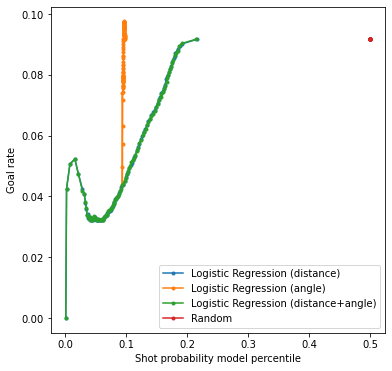

In [11]:
### goal_rate = F(shot probability model percentile) ###
def compute_goal_rate_per_percentile(probs, y):
    percentiles = []
    rates = []

    for i in range(0, 101):
        percentile = np.percentile(probs, i)
        goals = 0
        no_goals = 0
        for idx, p in enumerate(probs):
            if p<=percentile:
                if y[idx]==1:
                    goals+=1
                else:
                    no_goals+=1
        rate = goals / (goals + no_goals)
        percentiles.append(percentile)
        rates.append(rate)
    return percentiles, rates


percentiles1, rates1 = compute_goal_rate_per_percentile(lr_probs1, y_val)
percentiles2, rates2 = compute_goal_rate_per_percentile(lr_probs2, y_val)
percentiles3, rates3 = compute_goal_rate_per_percentile(lr_probs3, y_val)
percentiles4, rates4 = compute_goal_rate_per_percentile(random_probs, y_val)

plt.figure(figsize=(6, 6))

plt.plot(percentiles1, rates1, marker='.', label='Logistic Regression (distance)')
plt.plot(percentiles2, rates2, marker='.', label='Logistic Regression (angle)')
plt.plot(percentiles3, rates3, marker='.', label='Logistic Regression (distance+angle)')
plt.plot(percentiles4, rates4, marker='.', label='Random')

plt.xlabel('Shot probability model percentile')
plt.ylabel('Goal rate')
plt.legend()

plt.savefig('../figures/goal_rate_percentile_1.png')

plt.show()

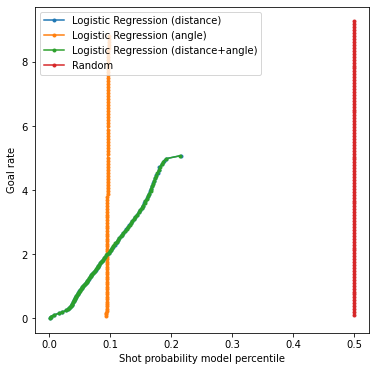

In [12]:
### cumulative portion of goals = F(shot probability model percentile) ###

def compute_cumulative_goal_rate_per_percentile(probs, y):
    percentiles = []
    rates = []
    cum_rate = 0

    for i in range(0, 101):
        percentile = np.percentile(probs, i)
        goals = 0
        no_goals = 0
        for idx, p in enumerate(probs):
            if p<=percentile:
                if y[idx]==1:
                    goals+=1
                else:
                    no_goals+=1
        cum_rate += goals / (goals + no_goals)
        percentiles.append(percentile)
        rates.append(cum_rate)
    return percentiles, rates


percentiles1, rates1 = compute_cumulative_goal_rate_per_percentile(lr_probs1, y_val)
percentiles2, rates2 = compute_cumulative_goal_rate_per_percentile(lr_probs2, y_val)
percentiles3, rates3 = compute_cumulative_goal_rate_per_percentile(lr_probs3, y_val)
percentiles4, rates4 = compute_cumulative_goal_rate_per_percentile(random_probs, y_val)

plt.figure(figsize=(6, 6))

plt.plot(percentiles1, rates1, marker='.', label='Logistic Regression (distance)')
plt.plot(percentiles2, rates2, marker='.', label='Logistic Regression (angle)')
plt.plot(percentiles3, rates3, marker='.', label='Logistic Regression (distance+angle)')
plt.plot(percentiles4, rates4, marker='.', label='Random')

plt.xlabel('Shot probability model percentile')
plt.ylabel('Goal rate')
plt.legend()

plt.savefig('../figures/goal_rate_percentile_2.png')

plt.show()

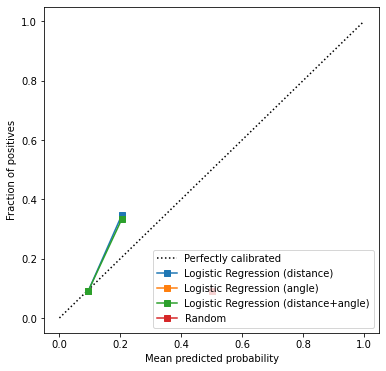

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))

disp1 = CalibrationDisplay.from_estimator(lr_clf1, X_val1, y_val, label='Logistic Regression (distance)', ax=ax)
disp2 = CalibrationDisplay.from_estimator(lr_clf2, X_val2, y_val, label='Logistic Regression (angle)', ax=ax)
disp3 = CalibrationDisplay.from_estimator(lr_clf3, X_val3, y_val, label='Logistic Regression (distance+angle)', ax=ax)
disp4 = CalibrationDisplay.from_estimator(random_clf, X_val3, y_val, label='Random', ax=ax)

plt.savefig('../figures/calibration_diagram.png')

plt.show()

In [14]:
# All the 3 logistic regression models always predict 0 as it is the dominating label
np.sum([round(p) for p in lr_probs1]), np.sum([round(p) for p in lr_probs2]), np.sum([round(p) for p in lr_probs3])

(0, 0, 0)